In [1]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
using LinearAlgebra
using Random
using DifferentialEquations
include("../Potential/starobinsky.jl")
include("../inflationBasicEqs.jl")
include("../inflationSDE.jl")
include("../sampling.jl")

SampleNTotAdd2Paths (generic function with 1 method)

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
dN = 0.001
h0 = 1e-5
V0 = 3 * h0^2
APlus = sqrt(9 * h0^6 / (4 * pi^2 * 8.5e-10))
AMinus = APlus / 1700
phi0 = 0
phiIni = 1.93e-2
vIni = -5.45e-7
nPath = 1000000
iniVec = [phiIni, vIni, 0]
sigma = 0.1
phiEnd = -1.87e-2

potFunc = makePotFuncStarobinsky(V0, APlus, AMinus, phi0)
potDerFunc = makePotDerFuncStarobinsky(APlus, AMinus, phi0)

driftFunc, volFunc = makeDriftAndVolFunc(
    potFunc, potDerFunc, nothing, nothing,
    infPSType="Starobinsky", additionalParams=Dict("phiEnd"=>phiEnd, "APlus"=>APlus, "AMinus"=>AMinus, "phi0"=>phi0, "sigma"=>sigma, "h0"=>h0))

(var"#drift!#15"{var"#f#1"{Float64, Float64, Float64, Int64}, var"#f#2"{Float64, Float64, Int64}, Float64}(var"#f#1"{Float64, Float64, Float64, Int64}(3.0000000000000005e-10, 1.637690853521794e-11, 9.63347560895173e-15, 0), var"#f#2"{Float64, Float64, Int64}(1.637690853521794e-11, 9.63347560895173e-15, 0), -0.0187), var"#vol!#17"{var"#f#1"{Float64, Float64, Float64, Int64}, var"#f#2"{Float64, Float64, Int64}, Float64, Int64, var"#14#16"{Float64, Float64, Int64, Float64, Float64}}(var"#f#1"{Float64, Float64, Float64, Int64}(3.0000000000000005e-10, 1.637690853521794e-11, 9.63347560895173e-15, 0), var"#f#2"{Float64, Float64, Int64}(1.637690853521794e-11, 9.63347560895173e-15, 0), -0.0187, 0, var"#14#16"{Float64, Float64, Int64, Float64, Float64}(1.637690853521794e-11, 9.63347560895173e-15, 0, 0.1, 1.0e-5)))

In [4]:
NsPsMin = 10.0
NsPsMax = 15.0
NSimEnd = 20.0

20.0

In [5]:
NTotFilePath = "NTot.csv"
NTotDf = SampleNTotAdd2Paths(nPath, iniVec, NSimEnd, [NsPsMin, NsPsMax], driftFunc, volFunc, dN, NTotFilePath, discScheme=SRIW2())

iPath=1 :2025-08-19T12:29:40.302
iPath=1001 :2025-08-19T12:30:43.986
iPath=2001 :2025-08-19T12:31:42.958
iPath=3001 :2025-08-19T12:32:43.605
iPath=4001 :2025-08-19T12:33:42.152
iPath=5001 :2025-08-19T12:34:42.052
iPath=6001 :2025-08-19T12:35:41.749
iPath=7001 :2025-08-19T12:36:42.061
iPath=8001 :2025-08-19T12:37:42.091
iPath=9001 :2025-08-19T12:38:42.062
iPath=10001 :2025-08-19T12:39:42.453
iPath=11001 :2025-08-19T12:40:43.268
iPath=12001 :2025-08-19T12:41:43.899
iPath=13001 :2025-08-19T12:42:46.233
iPath=14001 :2025-08-19T12:43:46.913
iPath=15001 :2025-08-19T12:44:45.622
iPath=16001 :2025-08-19T12:45:48.436
iPath=17001 :2025-08-19T12:46:49.933
iPath=18001 :2025-08-19T12:47:51.946
iPath=19001 :2025-08-19T12:48:53.471
iPath=20001 :2025-08-19T12:49:55.287
iPath=21001 :2025-08-19T12:50:55.220
iPath=22001 :2025-08-19T12:51:55.299
iPath=23001 :2025-08-19T12:52:54.611
iPath=24001 :2025-08-19T12:53:53.873
iPath=25001 :2025-08-19T12:54:53.513
iPath=26001 :2025-08-19T12:55:52.477
iPath=27001 :2

Row,NBk,NTot1,NTot2,phi_vel_vec_elem1,phi_vel_vec_elem2,phi_vel_vec_elem3
,Float64,Float64,Float64,Float64,Float64,Float64
1,11.7462,17.115,17.068,-0.0183237,-3.21267e-10,0.355
2,10.964,16.935,17.062,-0.0183448,-3.21147e-10,0.355
3,10.8386,16.794,16.801,-0.0183482,-3.21145e-10,0.355
4,10.0068,16.71,16.585,-0.0183771,-3.21119e-10,0.355
5,10.0623,16.772,16.78,-0.018368,-3.21122e-10,0.355
6,13.1161,16.873,16.776,-0.0182761,-3.40322e-10,0.355
7,14.5017,16.859,17.18,-0.0182311,-7.44476e-10,0.355
8,13.6528,16.786,17.047,-0.0182486,-5.10017e-10,0.355
9,13.3071,16.621,16.764,-0.0182692,-3.58053e-10,0.355


In [6]:
include("../fitting.jl")

FitByBinAve (generic function with 1 method)

In [7]:
# First, fit by the logistic function, and use the resultant parameters as initial parameters in fitting by the logistic+linear function
fitResultLogit, delNSqFitLogit, psFitLogit, delNSqErrLogit, psErrLogit = FitByLS(NTotDf, "logistic", 4, NsPsMin, NsPsMax)

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.036802414798778375, -3.1017476288636145, -4.278917573894489, -3.0564162554897734, -1.5960485971338076, -0.42398208809640675], [0.028075740770026246, 0.019154328571002167, 0.02683100575286174, 0.01684686900803868, 0.024718198393552836, 0.029162061836424613, -0.014730776055951106, 0.0018655067848413684, 0.024483363877603345, -0.005350564955393627  …  -0.04004380069610187, 0.003972684429345053, 0.03558490146808985, 0.034281433035224865, 0.03573326514858458, 0.0327516989699364, -0.0687660297071174, 0.018146904191222474, 0.004478774658805293, -0.08656541758811623], [0.7928892962479615 -0.00604354020153462 … -0.0023191865264137984 -0.0004244850924724717; 0.7395935489517221 -0.007087958549871275 … -0.0024226714747627508 0.002956710648603232; … ; 0.8529542104914557 -0.004615881242998503 … 9.143149501991373e-5 -0.0017279358622356935; 0.752031695840831 -0

In [8]:
fitResultLogit.param

6-element Vector{Float64}:
  0.036802414798778375
 -3.1017476288636145
 -4.278917573894489
 -3.0564162554897734
 -1.5960485971338076
 -0.42398208809640675

In [9]:
confidence_interval(fitResultLogit, 0.05)

6-element Vector{Tuple{Float64, Float64}}:
 (0.036591364816521414, 0.037013464781035336)
 (-3.510769052764956, -2.692726204962273)
 (-5.226009298184107, -3.331825849604871)
 (-4.045925958856244, -2.066906552123303)
 (-2.2498501471836914, -0.9422470470839237)
 (-0.6746786799417153, -0.17328549625109818)

In [10]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitValsLogit = [delNSqFitLogit(N) for N in NsPS]
psFitValsLogit = [psFitLogit(N) for N in NsPS]
delNSqErrValsLogit = [delNSqErrLogit(N) for N in NsPS]
psErrValsLogit = [psErrLogit(N) for N in NsPS]

100-element Vector{Float64}:
 NaN
   0.0011139806280518706
   0.0009696565949343747
   0.0008369581499809315
   0.0007161342506925676
   0.0006074350138616875
   0.0005111643293778654
   0.00042773724501529297
   0.0003577217091576604
   0.00030179937073886604
   0.0002605104746549618
   0.0002336649738598571
   0.0002196544420503784
   ⋮
   7.721267753487019e-5
   6.213531605390996e-5
   4.901868566767079e-5
   3.790240094237312e-5
   2.8717340056635614e-5
   2.1314177989199727e-5
   1.5491735570654115e-5
   1.102265611180998e-5
   7.674736367730292e-6
   5.227065583111219e-6
   3.480862564015263e-6
 NaN

In [11]:
NBksBin = LinRange(NsPsMin, NsPsMax, 11)
delNSqBinAve, psBinAve, delNSqBinAveErr, psBinAveErr, NBksdelNSq, NBksPS = FitByBinAve(NTotDf, NBksBin)

(Any[0.025228748093339033, 0.026487644449288923, 0.028000788302579342, 0.02916017742362756, 0.030658482272576178, 0.03210559699522872, 0.03444904416987297, 0.03626712554160399, 0.03656948662771164, 0.03684049624155588], [0.00251779271189978, 0.003026287706580838, 0.0023187782420964337, 0.0029966096978972373, 0.0028942294453050826, 0.004686894349288498, 0.0036361627434620403, 0.0006047221722152996, 0.0005420192276884839], Any[0.0001125694909093868, 0.00011904263522022203, 0.00012627142966254937, 0.00012951853122347958, 0.00013716732949016326, 0.00014346623552322744, 0.00015437081333539364, 0.00016225782550993836, 0.00016339072055235153, 0.00016489214859710481], [0.0003276769096764273, 0.0003470770689584606, 0.00036177077758885726, 0.00037730585052315563, 0.0003969757524820335, 0.00042148740785478804, 0.00044791941216716446, 0.0004605393772603174, 0.00046426694145323906], LinRange{Float64}(10.25, 14.75, 10), LinRange{Float64}(10.5, 14.5, 9))

In [12]:
psDfMS = CSV.read("calPlin_Starobinsky.csv", DataFrame, header=false)
NTotAve = mean([mean(NTotDf[:,"NTot1"]), mean(NTotDf[:,"NTot2"])])
sigma = 0.1
NsPSMS = NTotAve .- log.(psDfMS[:,1] / sigma)
psMS = psDfMS[:,2]

201-element Vector{Float64}:
 8.757257583474078e-5
 9.568143901232331e-5
 0.00010452089073375577
 0.00011415390679251746
 0.00012464847692309354
 0.00013607794211689507
 0.00014852134494919034
 0.0001620637916948633
 0.00017679682460446637
 0.0001928188022382568
 0.000210235285206569
 0.00022915942403133516
 0.00024971234511649693
 ⋮
 0.0025648653914138128
 0.002328348684352663
 0.0025754400091877786
 0.0023860355132057165
 0.0024842678078074456
 0.0024783449868278897
 0.0024079510942262416
 0.0025314633946245985
 0.002375434909681225
 0.002546970120717793
 0.002371630933056234
 0.0025405547409986253

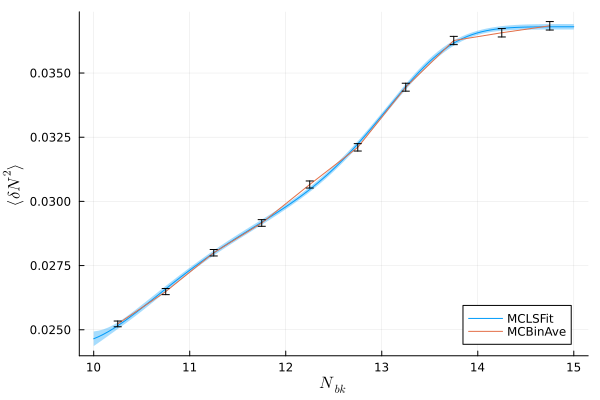

In [13]:
plot(NsPS, delNSqFitValsLogit, ribbon = delNSqErrValsLogit, fillalpha = 0.35, label="MCLSFit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="MCBinAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

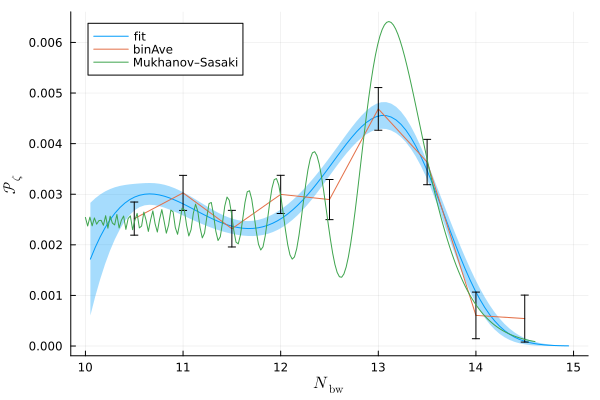

In [14]:
plot(NsPS, psFitValsLogit, ribbon = psErrValsLogit, fillalpha = 0.35, label="fit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="binAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta")

In [15]:
# fitting by the logistic+linear function
fitResult, delNSqFit, psFit, delNSqErr, psErr = FitByLS(NTotDf, "logistic+linear", 4, NsPsMin, NsPsMax, paramIni=vcat(fitResultLogit.param, 12.5))

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.037155281860791214, -7.817849120379471, 10.516612409349316, -13.443516864904753, 7.1165754317293315, -1.5953962086548774, 12.621374300805956], [0.028127462601999446, 0.019071913009821678, 0.02677573197675641, 0.016759182821389655, 0.02468853246203568, 0.02922799267146748, -0.014717272078420503, 0.0018403234659986473, 0.02459287555916996, -0.005222769018562931  …  -0.040035401857432144, 0.0038817804747054985, 0.035546000334025676, 0.03440638284679452, 0.035752484825661145, 0.03286614755094705, -0.06868715978636175, 0.018038674187066957, 0.0044279667087737465, -0.08666177140813125], [0.7867512003145296 -0.006381649667103195 … -0.0029378670438005502 -0.014594064871348572; 0.7303514238302038 -0.007847921801095586 … -0.004011934843617393 -0.02763728508856196; … ; 0.8434861785266553 -0.00490666301359681 … -0.0018574157190000967 -0.0014733246669044503;

In [16]:
fitResult.param

7-element Vector{Float64}:
   0.037155281860791214
  -7.817849120379471
  10.516612409349316
 -13.443516864904753
   7.1165754317293315
  -1.5953962086548774
  12.621374300805956

In [17]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitVals = [delNSqFit(N) for N in NsPS]
psFitVals = [psFit(N) for N in NsPS]
delNSqErrVals = [delNSqErr(N) for N in NsPS]
psErrVals = [psErr(N) for N in NsPS]

100-element Vector{Float64}:
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   7.972815718949221e-5
   ⋮
   0.0005788935550897301
   0.0005902605971664556
   0.0005682563423599841
   0.0005142570932087475
   0.0004447723591455857
   0.00041767562199966895
   0.0005296862631818699
   0.0008029703944543196
   0.001201617788167764
   0.0017045534654944838
   0.002303235573960867
 NaN

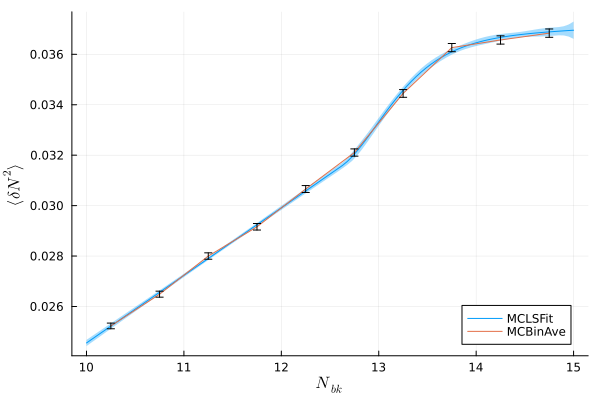

In [18]:
plot(NsPS, delNSqFitVals, ribbon = delNSqErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="MCBinAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

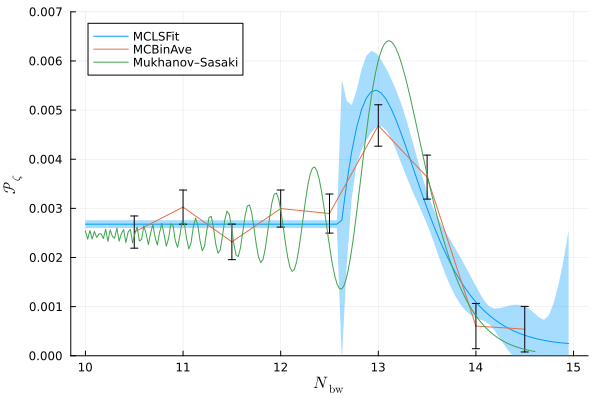

In [19]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="MCBinAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta", ylim=(0,0.007))

In [20]:
# fitting by the logistic+quadratic function
fitResultQuad, delNSqFitQuad, psFitQuad, delNSqErrQuad, psErrQuad = FitByLS(NTotDf, "logistic+quadratic", 4, NsPsMin, NsPsMax, paramIni=vcat(fitResult.param, 0.0))

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.12244849671078836, 0.05460911120911651, 2.08283517699838, -2.379080247678952, 1.5128894516594222, -0.46491631220397217, 12.573084907430022, -1.1769433363477213e-5], [0.028134308981020623, 0.019077654065474115, 0.026779955270240817, 0.016743973059713757, 0.02467512825911966, 0.02914717233307345, -0.015005473471570503, 0.001975852254990494, 0.024555253380893177, -0.005221704200515338  …  -0.04031824683514339, 0.003889534578279754, 0.03569110706869229, 0.03465776599574057, 0.035459831396274705, 0.03297325673827645, -0.06866198317225657, 0.018131123384403786, 0.004421395618254706, -0.08665459426566716], [0.2388502663419367 -0.022300471640007875 … -0.009439173984935224 0.6837263332674659; 0.22191064926606416 -0.021291414117639504 … -0.018367956663153065 2.5890236436784906; … ; 0.25589056092516926 -0.023315526310698984 … -0.00045732472441066465 0.0016

In [21]:
fitResultQuad.param

8-element Vector{Float64}:
  0.12244849671078836
  0.05460911120911651
  2.08283517699838
 -2.379080247678952
  1.5128894516594222
 -0.46491631220397217
 12.573084907430022
 -1.1769433363477213e-5

In [22]:
delNSqFitValsQuad = [delNSqFitQuad(N) for N in NsPS]
psFitValsQuad = [psFitQuad(N) for N in NsPS]
delNSqErrValsQuad = [delNSqErrQuad(N) for N in NsPS]
psErrValsQuad = [psErrQuad(N) for N in NsPS]

100-element Vector{Float64}:
   0.0003285768560847707
   0.0003167255473894961
   0.00030490597590500525
   0.00029312198087703544
   0.0002813780321243071
   0.0002696793614825977
   0.0002580321274869587
   0.00024644362312653176
   0.00023492253979017278
   0.0002234793050424772
   0.00021212651795605598
   0.00020087951417897972
   0.0001897571041399814
   ⋮
   0.00037838699503315226
   0.00036615577767694916
   0.0003659993157655884
   0.00038956756932567645
   0.00044743866973592474
   0.0005467655909825148
   0.0006939639600340643
   0.00090006869195491
   0.0011852344708589012
   0.0015820096022285735
   0.0021379677839032944
 NaN

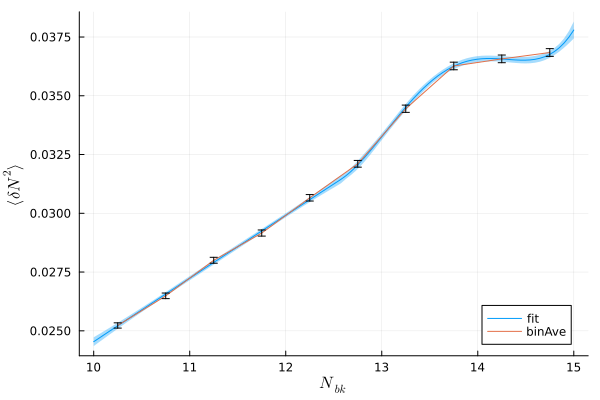

In [23]:
plot(NsPS, delNSqFitValsQuad, ribbon = delNSqErrValsQuad, fillalpha = 0.35, label="fit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="binAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

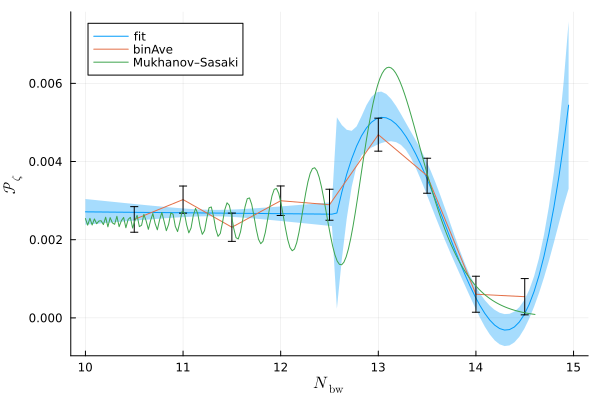

In [24]:
plot(NsPS, psFitValsQuad, ribbon = psErrValsQuad, fillalpha = 0.35, label="fit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="binAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta")

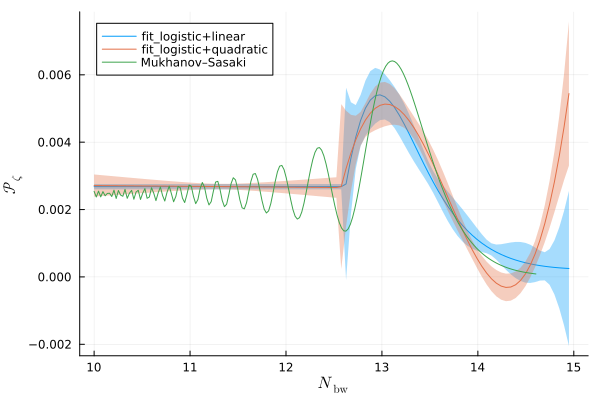

In [25]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="fit_logistic+linear")
plot!(NsPS, psFitValsQuad, ribbon = psErrValsQuad, fillalpha = 0.35, label="fit_logistic+quadratic")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta")